https://mp.weixin.qq.com/s/myBYHS0EVJyy8JQ0i-ZA8g

# Ultimate Smoother：终极指标平滑器

终极平滑器（Ultimate Smoother）是由交易系统和算法交易策略开发者John Ehlers设计的一种数学工具，用于金融数据的平滑处理，它使用高通滤波器从价格曲线中减去高频成分，实现了其强大的平滑能力。终极平滑器旨在减少价格数据中的高频噪声，同时保持对市场趋势的敏感性，从而提供一个更加清晰和平滑的价格曲线表示。

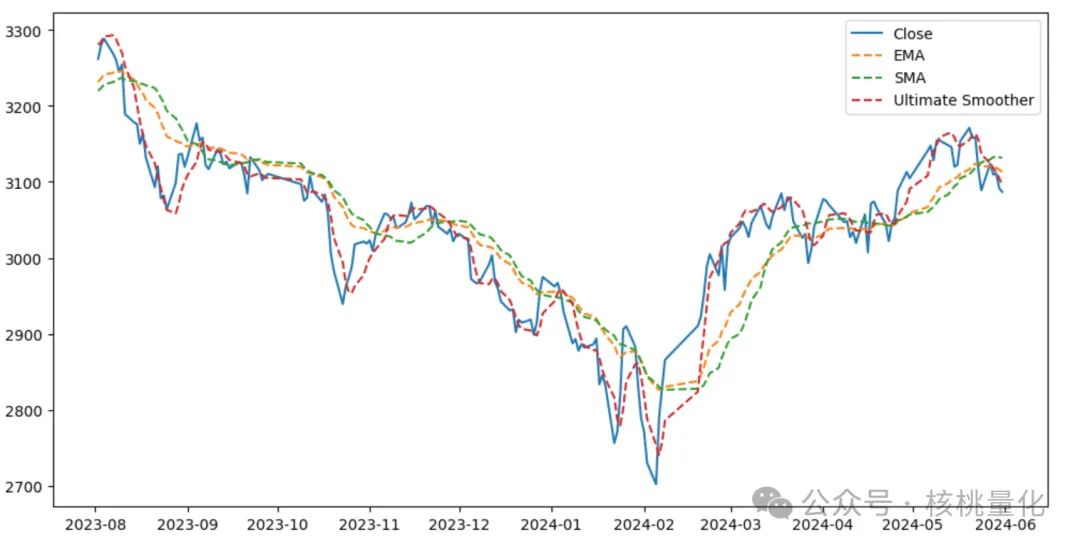

终极平滑器的工作原理基于以下几个关键概念：

高通滤波器（Highpass Filter）：这是一种信号处理技术，用于去除信号中的低频成分，只允许高频成分通过。在金融分析中，这意味着可以减少价格数据中的长期趋势和周期性波动，从而突出短期的价格变动。
减法操作：终极平滑器通过从原始价格数据中减去其高通滤波后的版本来工作。这样，低频成分（如长期趋势）被去除，而高频成分（如短期波动）被保留。
指数移动平均（EMA）：虽然终极平滑器本身不直接使用EMA，但EMA是一种常见的平滑技术，通过给予最近的数据更多的权重来计算平均值。终极平滑器的设计哲学与EMA相似，但采用了不同的数学方法来实现平滑效果。
数学公式：终极平滑器使用特定的数学公式来计算平滑后的价格。这涉及到一些三角函数和指数函数的计算，以确定如何从原始数据中减去高频成分。
无滞后（Lag-Free）：终极平滑器的一个关键特点是无滞后，这意味着它在计算平滑价格时不需要未来的数据。这对于实时交易系统来说非常重要，因为它们需要即时的反应。
自适应性：终极平滑器可以根据不同的市场条件调整其平滑参数，以实现最佳的平滑效果。

In [35]:
import numpy as np
import pandas as pd
# import pandas_ta as ta
# import akshare as ak
import matplotlib.pyplot as plt

In [36]:
def ultimate_smoother(price, period):
    # 初始化变量
    a1 = np.exp(-1.414 * np.pi / period)
    b1 = 2 * a1 * np.cos(1.414 * 180 / period)
    c2 = b1
    c3 = -a1 * a1
    c1 = (1 + c2 - c3) / 4
    
    # 准备输出结果的序列
    us = np.zeros(len(price))
    
    # 计算 Ultimate Smoother
    for i in range(len(price)):
        if i < 4:
            us[i] = price[i]
        else:
            us[i] = (1 - c1) * price[i] + (2 * c1 - c2) * price[i - 1] \
                    - (c1 + c3) * price[i - 2] + c2 * us[i - 1] + c3 * us[i - 2]
    
    return us

In [42]:
df_new = pd.read_csv(r"E:\of_data\主力连续\tick生成的OF数据(5M)\data_rs_merged\中金所\IM888\IM888_rs_2023_5T_back_ofdata_dj.csv")

In [ ]:
df_new.iloc[-1]

In [43]:
df_new["UltimateSmoother"] = ultimate_smoother(df_new["close"].values, 20)

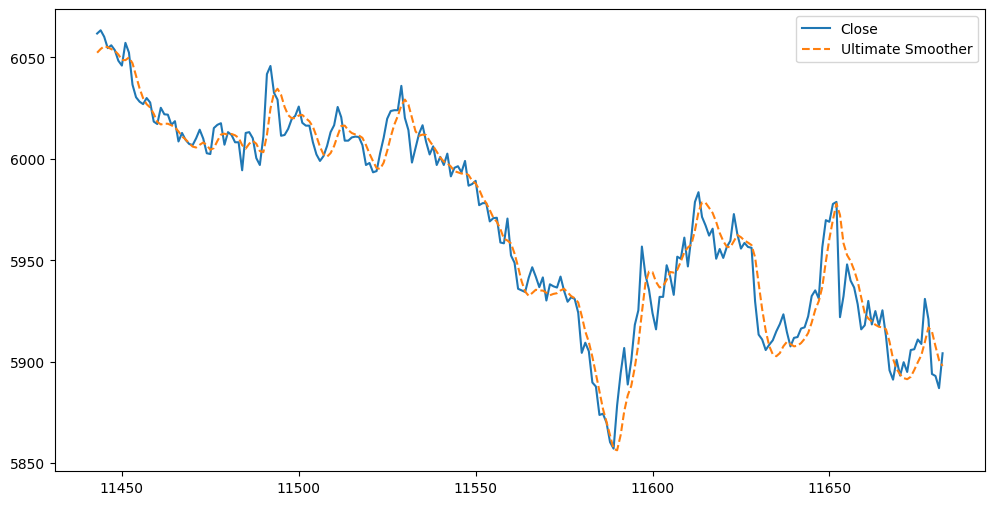

In [44]:
df_new = df_new.iloc[-480:-240]

plt.figure(figsize=(12, 6))
plt.plot(df_new.index, df_new['close'], label='Close')
plt.plot(df_new.index, df_new['UltimateSmoother'], label='Ultimate Smoother', linestyle='--')
plt.legend()

plt.show()

In [ ]:
# 获取数据
df = ak.stock_zh_index_daily(symbol="sh000001").iloc[-270:]
df = df.set_index("date")
period = 20

df["UltimateSmoother"] = ultimate_smoother(df["close"].values, period)
df["EMA"] = df.ta.ema(length=period).values
df["SMA"] = df.ta.sma(length=period).values



df = df.iloc[-200:]

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['close'], label='Close')
plt.plot(df.index, df['EMA'], label='EMA', linestyle='--')
plt.plot(df.index, df['SMA'], label='SMA', linestyle='--')
plt.plot(df.index, df['UltimateSmoother'], label='Ultimate Smoother', linestyle='--')
plt.legend()

plt.show()